<a href="https://colab.research.google.com/github/grievous-mischievous7/NNDL_LAB/blob/main/Spring_22_NNDL_Lab_3_190020028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 3 : Associative Networks 

Name : **Neville Thomas Sebastian**

Roll Number : **190020028**

Referrence Material : **Chapter 4, page no. 90-110, Artificial Neural Network by B. Yegnanarayana**


#**Problem 1** : Demonstrate the working principle of two layer auto-associative network. Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Effect of orthonormal, orthogonal, linearly independent and linearly dependent input vectors.
3. Use all 3 learning rules (i.e. by computation, Widrow and Hebbian), to find the optimal weight and mention their pros. and cons.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2.  First do it using computation method for each set of data (i.e orthogonal, orthonormal, linearly independent and linearly dependent (not all only few) case ), then take the performance as reference, to implement using Widrow and Hebbian learning.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## OBJECTIVE
Implementation of two layer auto-associative network.
## HYPOTHESIS


*  **Computation :** By computation method the final weights matrix is obtained by multiplying the target matrix with the pseudo inverse of input matrix.
*   **Widrow :** By widrow's method , the weights are learned in recursion using the learning law.
*   **Hebbian :**By hebbian method , the weights are updated using the weight update rule of hebbian . 

## EXPERIMENTAL DESCRIPTION
*  **Computation :** By computation method the final weights matrix is obtained by multiplying the target matrix with the pseudo inverse of input matrix.This will provide the weight matrix which gives the least mean squared error.And this is implemented below.
  
*   **Widrow :** By widrow's method , the weights are learned in recursion using the learning law.The learning law is : W(l+1)=W(l)+lr*(error)*(input).
and this is implemnted.
*   **Hebbian :**By hebbian method , the weights are updated using the weight update rule of hebbian . The weight update is : Dw=(input vector)*(output vector)


## Programming : 
  Please write a program to demonstrate the same

In [99]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data
#N_data=3
#dim=3
A_LI=np.array([[0,1,2],[1,2,0],[2,1,0]]).T
B_LI=[3,1,2]*(A_LI)
print('3*3 Linearly independant input matrix : \n',A_LI)
print('corresponding output matrix : \n ',B_LI)
print('\n')

A_orthonormal=sc.orth(A_LI)
B_orthonormal=[3,1,2]*(A_orthonormal)
print('3*3 Orthonormal input matrix : \n',A_orthonormal)
print('corresponding output matrix : \n ',B_orthonormal)
print('\n')

A_LD=np.array([[0,1,2],[1,2,0],[1,3,2]]).T
B_LD=[3,1,2]*(A_LD)
print('3*3 Linearly dependant input matrix : \n',A_LD)
print('corresponding output matrix : \n ',B_LD)
print('\n')

#LI with L<M
A_LI_1=np.array([[0,1,2,3],[1,2,3,0],[2,3,0,1]]).T
B_LI_1=[3,1,2]*(A_LI_1)
print('4*3 Linearly independant input matrix : \n',A_LI_1)
print('corresponding output matrix : \n ',B_LI_1)
print('\n')

#LI with M<L
A_LI_2=np.array([[0,1,2,3],[1,2,3,0],[2,3,0,1]])
B_LI_2=[3,1,2,4]*(A_LI_2)
print('3*4 Linearly independant input matrix : \n',A_LI_2)
print('corresponding output matrix : \n ',B_LI_2)
print('\n')

3*3 Linearly independant input matrix : 
 [[0 1 2]
 [1 2 1]
 [2 0 0]]
corresponding output matrix : 
  [[0 1 4]
 [3 2 2]
 [6 0 0]]


3*3 Orthonormal input matrix : 
 [[-0.60990372 -0.47843872 -0.63175457]
 [-0.75084393  0.09388571  0.65377279]
 [-0.25347749  0.87308755 -0.41649405]]
corresponding output matrix : 
  [[-1.82971117 -0.47843872 -1.26350914]
 [-2.2525318   0.09388571  1.30754558]
 [-0.76043248  0.87308755 -0.83298811]]


3*3 Linearly dependant input matrix : 
 [[0 1 1]
 [1 2 3]
 [2 0 2]]
corresponding output matrix : 
  [[0 1 2]
 [3 2 6]
 [6 0 4]]


4*3 Linearly independant input matrix : 
 [[0 1 2]
 [1 2 3]
 [2 3 0]
 [3 0 1]]
corresponding output matrix : 
  [[0 1 4]
 [3 2 6]
 [6 3 0]
 [9 0 2]]


3*4 Linearly independant input matrix : 
 [[0 1 2 3]
 [1 2 3 0]
 [2 3 0 1]]
corresponding output matrix : 
  [[ 0  1  4 12]
 [ 3  2  6  0]
 [ 6  3  0  4]]




In [ ]:
def weights_by_computation(A,B):

  ## Here A is input and B is output
  
  weights = B@np.linalg.pinv(A)## Write the weight equation here
  error = np.square(np.linalg.norm(B-(weights@A)))*1/A.shape[1]## Mean Squared Error

  return weights,error


In [111]:
def weights_by_widrow(A,B,num_epochs,learning_rate,w_initial):

  ## Here A is input and B is output
  weights = w_initial## Initialise weights here
  error=[]
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    output=weights@A
    D_w=lr*((B-output)@A.T)
    weights+=D_w
    error.append((1/A.shape[1])*np.sum(np.square(B-output)))

  return weights,error


In [139]:
def weights_by_hebbian(A,B,num_epochs,lr,w_initial):

  ## Here A is input and B is output
  weights = w_initial ## Initialise weights here
  error=[]
  for epoch in range(num_epochs):
    for i in range(A.shape[1]):
      input=np.matrix(A[:,i]).T
      target=np.matrix(B[:,i]).T
      D_w=lr*input@target.T
      weights+=D_w
    error=(np.square(np.linalg.norm(B-(weights@A)))*1/A.shape[1])
    if np.round(error,8) == 0:
      return weights,error;
    
  return weights,error

In [105]:
w,err=weights_by_computation(A_LI,B_LI)
print('weights by computation for linearly independant A \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

w,err=weights_by_computation(A_orthonormal,B_orthonormal)
print('weights by computation for orthonormal A \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

w,err=weights_by_computation(A_LD,B_LD)
print('weights by computation for linearly dependant A \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

w,err=weights_by_computation(A_LI_1,B_LI_1)
print('weights by computation for linearly independant A , L<M \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

w,err=weights_by_computation(A_LI_2,B_LI_2)
print('weights by computation for linearly independant A , L>M \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

weights by computation for linearly independant A 
 [[ 2.33333333e+00 -6.66666667e-01  3.33333333e-01]
 [ 6.66666667e-01  6.66666667e-01  1.16666667e+00]
 [-8.44199333e-17 -5.59772179e-18  3.00000000e+00]]
error by computation = 0.0


weights by computation for orthonormal A 
 [[2.14307894 0.50286107 0.57231576]
 [0.50286107 2.55495208 0.10835159]
 [0.57231576 0.10835159 1.30196898]]
error by computation = 0.0


weights by computation for linearly dependant A 
 [[ 2.85714286e-01  5.23809524e-01 -9.52380952e-02]
 [ 2.38095238e-01  1.04761905e+00  1.14285714e+00]
 [-6.66666667e-01 -3.33066907e-16  2.66666667e+00]]
error by computation = 0.66666667


weights by computation for linearly independant A , L<M 
 [[ 0.68421053  0.86842105 -0.47368421  0.02631579]
 [ 0.78289474  1.19078947 -0.38815789  0.86184211]
 [-0.43421053 -0.11842105  1.22368421  1.22368421]
 [-0.44078947 -0.00657895  0.15131579  2.90131579]]
error by computation = 0.0


weights by computation for linearly independant A , 

weights by widrow for linearly independant A 
 [[ 2.33333333e+00 -6.66666667e-01  3.33333333e-01]
 [ 6.66666667e-01  6.66666667e-01  1.16666667e+00]
 [-4.73696774e-15  5.92120563e-15  3.00000000e+00]]
error by widrow = 0.0




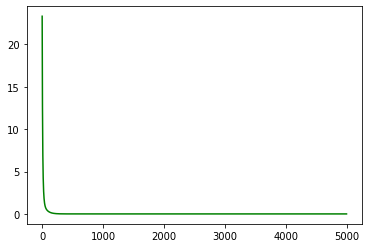


weights by widrow for linearly independant A 
 [[2.14307894 0.50286107 0.57231576]
 [0.50286107 2.55495208 0.10835159]
 [0.57231576 0.10835159 1.30196898]]
error by widrow = 0.0




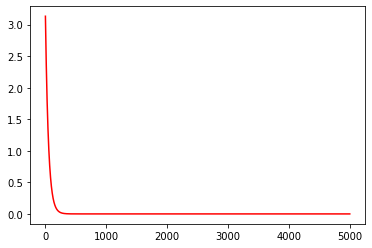


weights by widrow for linearly dependant A 
 [[ 1.83598274 -0.2513247   0.29232902]
 [-0.3314492   1.33239127  1.00047103]
 [-0.02389927 -0.3213837   2.82735851]]
error by widrow = 0.66666667




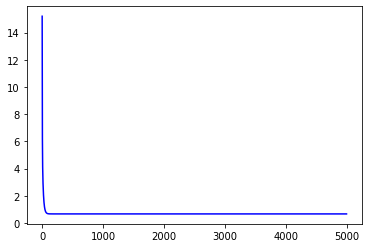


weights by widrow for linearly independant A ,L<M 
 [[ 0.68421053  0.86842105 -0.47368421  0.02631579]
 [ 0.78289474  1.19078947 -0.38815789  0.86184211]
 [-0.43421053 -0.11842105  1.22368421  1.22368421]
 [-0.44078947 -0.00657895  0.15131579  2.90131579]]
error by widrow = 0.0




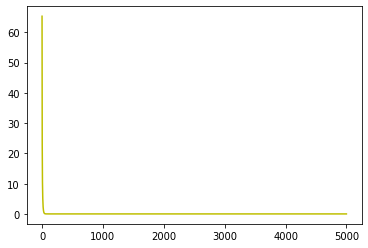


weights by widrow for linearly independant A ,L>M 
 [[ 3.90131579 -1.31578947  0.15131579]
 [ 0.00657895  1.92105263 -0.24342105]
 [ 0.58552632 -0.52631579  1.83552632]]
error by widrow = 4.50986842




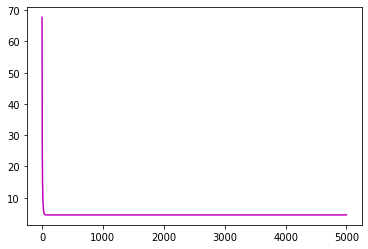

In [147]:
num_epochs=5000
lr=0.01
w_initial=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])

w,err=weights_by_widrow(A_LI,B_LI,num_epochs,lr,w_initial)
print('weights by widrow for linearly independant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='g')
plt.show()
print('================================================\n')

w,err=weights_by_widrow(A_orthonormal,B_orthonormal,num_epochs,lr,w_initial)
print('weights by widrow for linearly independant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='r')
plt.show()
print('===============================================\n')

w,err=weights_by_widrow(A_LD,B_LD,num_epochs,lr,w_initial)
print('weights by widrow for linearly dependant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='b')
plt.show()
print('===============================================\n')

w_initial=np.array([[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]])
w,err=weights_by_widrow(A_LI_1,B_LI_1,num_epochs,lr,w_initial)
print('weights by widrow for linearly independant A ,L<M \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='y')
plt.show()
print('================================================\n')

w_initial=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
w,err=weights_by_widrow(A_LI_2,B_LI_2,num_epochs,lr,w_initial)
print('weights by widrow for linearly independant A ,L>M \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='m')
plt.show()
print('================================================\n')

In [143]:
num_epochs=5
lr=1

w_initial=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
w,err= weights_by_hebbian(A_LI,B_LI,num_epochs,lr,w_initial)
print('weights by hebbian for linearly independant A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')
w_initial=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
w,err= weights_by_hebbian(A_orthonormal,B_orthonormal,num_epochs,lr,w_initial)
print('weights by hebbian for orthonormal A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')
w_initial=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
w,err= weights_by_hebbian(A_LD,B_LD,num_epochs,lr,w_initial)
print('weights by hebbian for linearly dependant A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')

w_initial=np.array([[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]])
w,err= weights_by_hebbian(A_LI_1,B_LI_1,num_epochs,lr,w_initial)
print('weights by hebbian for linearly independant A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')

w_initial=np.array([[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0]])
w,err= weights_by_hebbian(A_LI_2,B_LI_2,num_epochs,lr,w_initial)
print('weights by hebbian for linearly independant A \n',(w))
print('error by hebbian = '+str(np.round(err,8)))
print('\n')


weights by hebbian for linearly independant A 
 [[45. 30.  0.]
 [30. 45. 30.]
 [ 0. 30. 60.]]
error by hebbian = 28448.33333333


weights by hebbian for orthonormal A 
 [[2.14307894 0.50286107 0.57231576]
 [0.50286107 2.55495208 0.10835159]
 [0.57231576 0.10835159 1.30196898]]
error by hebbian = 0.0


weights by hebbian for linearly dependant A 
 [[ 15.  40.  20.]
 [ 40. 125.  90.]
 [ 20.  90. 100.]]
error by hebbian = 307695.33333333


weights by hebbian for linearly independant A 
 [[ 45.  70.  15.  20.]
 [ 70. 125.  60.  75.]
 [ 15.  60. 105.  90.]
 [ 20.  75.  90. 145.]]
error by hebbian = 794612.0


weights by hebbian for linearly independant A 
 [[225.  70.  75.]
 [ 70. 125.  60.]
 [ 75.  60. 125.]]
error by hebbian = 662842.75




## Inferences and Conclusion : State all the key observations and conclusion

## INFERENCE


*   **By computation method**, except for linear dependant and linear independant with L>M all other cases gives approx. zero error . 
*   **By Widrow's method** , all cases will eventually have zero error as observed from the plots.
*   **By Widrow's method**,As the lr rate is increased the no.of iterations required for convergence decreases

| learning rate | iterations after which error converges |
|---------------|----------------------------------------|
| 0.0001        | 1152                                   |
| 0.001         | 620                                    |
| 0.01          | 350                                    |


*   **By hebbian method**, the error is zero only for the orthonormal case.
##CONCLUSION

*   The working principle of auto associative neural networks were demonstrated and verified.

# **Problem 2** : Demonstrate the working principle of two layer associative network performing heteroassociation task (i.e each input output pair is related with different functional relations).

Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Overcome the limitation by modifying the task to a pattern classification task.
3. Use computation and Widrow’s learning law to demonstrate the same.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2. First do it using computation method , then take the performance as reference, to
implement using Widrow learning.
3. Modify the data and network element such that the network will overcome the
limitation of limitation of no. of data points with the input dimensionality, and
perform pattern classification task.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## OBJECTIVE
Implementation of two layer hetero-associative network.
## HYPOTHESIS


*  **Computation :**By computation method the final weights matrix is obtained by multiplying the target matrix with the pseudo inverse of input matrix.  
*   **Widrow :**By widrow's method , the weights are learned in recursion using the learning law.



## EXPERIMENTAL DESCRIPTION

*  **Computation :** By computation method the final weights matrix is obtained by multiplying the target matrix with the pseudo inverse of input matrix.This will provide the weight matrix which gives the least mean squared error.And this is implemented below.
  
*   **Widrow :** By widrow's method , the weights are learned in recursion using the learning law.The learning law is : W(l+1)=W(l)+lr*(error)*(input).
and this is implemnted.

*   **Classification**:By classification , the activation function is taken to be the sign function.


## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data
A=np.array([[0,1,2],[1,2,0],[2,1,0]]).T
I=np.array([[1,2],[3,4],[2,1]]).T
B=np.dot(I,A)



[[0 1 2]
 [1 2 1]
 [2 0 0]]
[[1 3 2]
 [2 4 1]]
[[ 7  7  5]
 [ 6 10  8]]


In [ ]:
## You can use the same function defined above for computation method and widrow's learning law
def weights_by_computation(A,B):

  ## Here A is input and B is output
  
  weights = B@np.linalg.pinv(A)## Write the weight equation here
  error = np.square(np.linalg.norm(B-(weights@A)))*1/A.shape[1]## Mean Squared Error

  return weights,error

def weights_by_widrow(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights = np.array([[0.0,0.0,0.0],[0.0,0.0,0.0]])## Initialise weights here
  error=[]
  for epoch in range(num_epochs):

    ## Write the widrow learning training loop here
    output=weights@A
    D_w=lr*((B-output)@A.T)
    weights+=D_w
    error.append((1/A.shape[1])*np.sum(np.square(B-output)))

  return weights,error

In [ ]:
w,err=weights_by_computation(A,B)
print('weights by computation for linearly independant A \n',(w))
print('error by computation = '+str(np.round(err,8)))
print('\n')

weights by computation for linearly independant A 
 [[1. 3. 2.]
 [2. 4. 1.]]
error by computation = 0.0




weights by widrow for linearly independant A 
 [[1. 3. 2.]
 [2. 4. 1.]]
error by widrow = 0.0




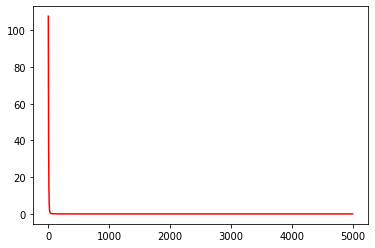

In [ ]:
num_epochs=5000
lr=0.01
w,err=weights_by_widrow(A,B,num_epochs,lr)
print('weights by widrow for linearly independant A \n',(w))
print('error by widrow = '+str(np.round(err[-1],8)))
print('\n')
err=np.array(err)
plt.plot(list(range(len(err))),err,color='r')
plt.show()
print('================================================\n')

## Inferences and Conclusion : State all the key observations and conclusion

## INFERENCE
*    for hetero association task for both computation and widrow the error obtained was zero . 

##CONCLUSION
*    The working principle of auto associative neural networks were demonstrated and verified.